<a href="https://colab.research.google.com/github/zetta-health/exp-curso-python-saude/blob/master/PySaude_03_python_analise_exploratoria_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória de dados

Já vencemos as etapas de conhecer e usar Colab do Google, Markdown e das noções introdutórias do Python. Parabéns!

Agora é a hora de trabalharmos com dados reais da saúde suplementar! Fantástico, não? O banco de dados que iremos trabalhar é de uma amostra de 300 beneficiários (quem tem plano de saúde). Os dados aqui tem propósito de estudo e não devem ser usados para pesquisa.

As 74 colunas possuem informações a respeito do uso de plano (custo e frequência) de 12 meses anteriores e posterioes a resposta de um questionário de auto-avaliação de risco e problemas de saúde. Cada linha representa um beneficiário.

O dicionário da base de dados pode ser acessado neste [link](https://raw.githubusercontent.com/zetta-health/exp-curso-python-saude/master/data/data_dictionary.md). Vamos discutir mais sobre o banco de dados ao longo deste notebook.

Ao trabalho!


## Abrir banco de dados e avaliar estrutura

In [0]:
# Carregar bibliotecas para análise de dados
import pandas as pd # Pandas
import numpy as np  # Numpy

In [0]:
# Abrir banco de dados
url = 'https://raw.githubusercontent.com/zetta-health/exp-curso-python-saude/master/data/sample_data.csv'
data = pd.read_csv(url)

In [3]:
# Verificar os primeiros casos
# do banco de dados
data.head()

,id,type,before.hra.12m.claims.total,before.hra.12m.elective.encounter.cost,before.hra.12m.elective.encounter.event,before.hra.12m.er.cost,before.hra.12m.er.event,before.hra.12m.exams.cost,before.hra.12m.exams.event,before.hra.12m.hospital.cost,before.hra.12m.hospital.events,before.hra.12m.outpatient.cost,before.hra.12m.outpatient.events,after.hra.12m.claims.total,after.hra.12m.elective.encounter.cost,after.hra.12m.elective.encounter.event,after.hra.12m.er.cost,after.hra.12m.er.event,after.hra.12m.exams.cost,after.hra.12m.exams.event,after.hra.12m.hospital.cost,after.hra.12m.hospital.events,after.hra.12m.outpatient.cost,after.hra.12m.outpatient.events,time.on.company,risk.factors.sum,gender,age,educational.level,househood.members,asthma.bronquitis.emphysema,allergies,migraine.headache,insomnia,rhinitis.sinusitis,colestherol,dyslipidemia,diabetes,thyroid,hepatitis,blood.pressure,heart.conditions,stroke,ms,kidney,gastritits,bowelsyndrome,rheumatism,low.back.pain,back.pain,osteoporosis,cancer,anxietydisorders,depression,othermentalcondition,stds,hiv,sedentary.lifestyle,n.risk.health.risk.factors,risk.alcoholism,mental.health.risk,weight.risk,smoking.risk,orthopedic.risk,beans.iron.risk,fruits.veggies,snacks,sugar.sweets,Integral.milk.risk,red.meat.risk,snack.time.risk,salt.risk,disease.risk.aggregated,total.risk
0,1,0,76.16,0.0,0,76.16,1,0.00,0,0,0,0.00,0,0,0.00,0,0.00,0,0.00,0,0.0,0,0.00,0,2,1,1,29,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,1,1,0,0,1,7
1,2,0,0.00,0.0,0,0.00,0,0.00,0,0,0,0.00,0,0,750.90,9,794.66,3,2436.59,88,0.0,0,499.93,3,3,3,0,34,6,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,1,0,0,0,0,0,0,1,5
2,3,0,2668.70,377.4,5,551.61,2,1187.06,44,0,0,552.63,11,0,313.64,4,274.68,1,346.84,7,0.0,0,12.16,1,13,0,0,42,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,3
3,4,0,605.97,228.3,3,0.00,0,303.74,9,0,0,73.93,1,0,470.49,6,316.77,2,533.61,18,0.0,0,452.94,8,2,1,0,23,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,1,0,0,0,0,0,0,1,3
4,5,0,226.90,72.2,1,103.13,1,51.57,3,0,0,0.00,0,0,308.99,4,534.67,2,805.26,42,0.0,0,0.00,0,2,1,0,21,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,1,7


In [4]:
# Obter informações sobre os tipos de variáveis
# do banco de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 74 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   id                                       300 non-null    int64  
 1   type                                     300 non-null    int64  
 2   before.hra.12m.claims.total              300 non-null    float64
 3   before.hra.12m.elective.encounter.cost   300 non-null    float64
 4   before.hra.12m.elective.encounter.event  300 non-null    int64  
 5   before.hra.12m.er.cost                   300 non-null    float64
 6   before.hra.12m.er.event                  300 non-null    int64  
 7   before.hra.12m.exams.cost                300 non-null    float64
 8   before.hra.12m.exams.event               300 non-null    int64  
 9   before.hra.12m.hospital.cost             300 non-null    int64  
 10  before.hra.12m.hospital.events           300 non-n

## Validação dos dados

Antes de qualquer análise de dados, precisamos validar a integridade dos dados que recebemos. Esta é uma etapa crucial e precisa sempre ser feita de acordo com manuais de boas práticas. A dura experiência também nos mostrou isso também.

Como fazer o teste? Verifique se seus dados possuem respostas faltantes, se as colunas estão com o tipo de dados adequado. Nós não esgotaremos os testes aqui, mas recomendamos que o os dados sejam validados por inúmeros testes e que uma crítica dos dados seja entregue junto com os resultados das análises.

In [5]:
# Validação:

# Teste dos dados 1. Verificar se as variáveis de custo separadas por 
# CETIPO estão somadas corretamente na variável 'before.hra.12m.claims.total'
# C - Consultas      - before.hra.12m.elective.encounter.cost
# E - Exames         - before.hra.12m.exams.cost
# T - Terapias       - before.hra.12m.er.cost
# I - Internação     - before.hra.12m.hospital.cost
# P - Procedimentos  - Não foi registrado na base.
# O - Outros         - before.hra.12m.outpatient.cost 

(data.filter(regex=("before.*.cost")).sum(axis=1) - data['before.hra.12m.claims.total']).describe()

count    300.000000
mean      -0.011167
std        0.100252
min       -0.470000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.500000
dtype: float64

**Conclusões**: A diferença entre a coluna com a soma das variáveis com de custo anteriores a entrevista de avaliação de risco é mínima. Muito provavelmente ligada a forma com que os arrendodamentos foram trabalhados no programa do analista (não vamos condená-lo por usar o Excel) e o Python. 

In [0]:
# Teste dos dados 2. Verificar se as variáveis de custo separadas por 
# CETIPO estão somadas corretamente na variável 'after.hra.12m.claims.total'
# C - Consultas      - after.hra.12m.elective.encounter.cost
# E - Exames         - after.hra.12m.exams.cost
# T - Terapias       - after.hra.12m.er.cost
# I - Internação     - after.hra.12m.hospital.cost
# P - Procedimentos  - Não foi registrado na base.
# O - Outros         - after.hra.12m.outpatient.cost 

# Agora é com você. Verifique se a soma está correta e defina quais serão 
# os próximos passos da análise

# Seu código aqui:


**Clique aqui para ver a resposta**

<!-- 
```python
(data.filter(regex=("after.*.cost")).sum(axis=1) - data['after.hra.12m.claims.total']).describe()
```
Alguma coisa está errada porque a diferença das duas colunas está longe de ser zero. Se inspecionarmos a coluna 'after.hra.12m.claims.total', verificaremos que  todos os valores estão zerados. Erro do planilheiro do Excel.

```python
data['after.hra.12m.claims.total']).describe()
```

Assim, precisaremos criar uma nova variável no banco com os valores corretos.

```
data['after.hra.12m.claims.total.r']) = data.filter(regex=("after.*.cost")).sum(axis=1)
```
-->

## Inserir explicação sobre nível de medidas

## Plano de análise

Toda análise exploratória precisa começar com algumas perguntas que podem ser respondidas pelos dados.

### Descrição dos dados sociodemográficos
Primeiro, iremos descrever o perfil de nossa amostra com as seguintes perguntas:

1. Qual a distribuição de sexo (variável 'gender') da amostra?
2. Qual a distribuição de idade (variável 'age') da amostra?
3. Qual a distribuição do tipo de beneficiário (variável 'type) na amostra?
4. Qual o nível socioeducacional dos participantes da amostra (variável 'educational.level')?

Fique a vontade para explorar os dados também.




**01. Qual a distribuição de sexo (variável 'gender') da amostra?**

In [6]:
# 1.a Qual a distribuição de sexo (variável 'gender') da amostra?

# Antes de fazer a conta, vamos mapear recodificar as variáveis para
# facilitar a interpretação da tabela.
data['gender_r'] = data['gender'].map({0: 'female', 1: 'male'})
data['gender_r'].value_counts()

female    223
male       77
Name: gender_r, dtype: int64

In [7]:
# 1.b Que tal calcular as porcentagens em vez dos números brutos?

# Simples, é só usar o parâmetro 'normalize' do método value_counts()
data['gender_r'].value_counts(normalize=True)

female    0.743333
male      0.256667
Name: gender_r, dtype: float64

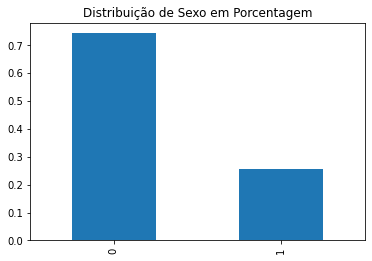

In [8]:
# Podemos visualizar melhor essa distribuição em um gráfico de barras.
import matplotlib.pyplot as plt

# Com o parâmetro 'kind' da função plot() você define o tipo do gráfico.
data['gender'].value_counts(normalize=True).plot(kind='bar')

plt.title('Distribuição de Sexo em Porcentagem')
plt.show()

### Descrição das características de saúde

1. Quantas pessoas não fizeram uso do plano de saúde nos 12 meses que antecederam a pesquisa?
2. Existem diferenças em condições de saúde (variáveis entre 'asthma.bronquitis.emphysema' e 'hiv') na vida entre aqueles que usaram o plano de saúde e aqueles que não fizeram uso do plano de saúde nos 12 meses que antecederam a pesquisa?  
    a. Criar uma variável (coluna) para classificar pessoas que não fizeram uso do plano de saúde nos 12 meses que antecederam a pesquisa.  
    b. Avaliar a diferença para uma condição de saúde 'asthma.bronquitis.emphysema'  
  c. Fazer para todas as variáveis entre 'asthma.bronquitis.emphysema' e 'hiv'


### Descrição dos custos em saúde (sinistro)

0. Retirar as pessoas que não usaram o plano de saúde da base de dados (habilidade: subset do banco de dados)
1. Fazer uma matriz de correlação entre as variáveis de custo antes e depois (inserir nomes das variáveis aqui)(correlação).
2. Gerar um heatmap das correlações(visualização de correlação)
3. Transformar usando log as variáveis de custo total antes e depois. Após, aplicar uma correlação de Pearson.(transformação para escala log, correlação, e visualização de correlação)

### Regressão múltipla (sinistro)



# A Fazer

1. Abrir banco de dados - Okay
2. Validação dos dados  - Okay 
3. Análise exploratória:

  a. Tabelas de frequência - Okay 
  b. Gráficos de barras    - (Ana) 

5. Níveis de medidas e as análises apropriadas: (Henrique)
    1. Escala Nominal 
    2. Escala Ordinal
    3. Escalas Intervalares e de Razão
        a. Medidas de tendência central (Média, mediana, moda)
        b. Medidas de dispersão (Desvio padrão, distância interquartílica)
        c. Análise exploratória
        d. Correlação
        e. Modelos Lineares Gerais (ANOVA)
6. ANOVA
7. Redução de dimensionalidade (PCA a AF)